In [25]:
import os
import tensorflow as tf
import numpy as np

def int_to_ohbinary(y_int):
    y = [np.zeros((1, 8)) for _ in range(len(y_int))]
    for (idx, yy) in enumerate(y_int):
        bit = -1
        base = 256
        while base > 1:
            base /= 2
            bit += 1
            if yy >= base:
                yy -= base
                y[idx][0, bit] = 1.0
            else:
                y[idx][0, bit] = 0.0
        assert yy == 0
    y = [tf.convert_to_tensor(yy, dtype='float32') for yy in y]
    y = tf.stack(y, axis=0)
    return y

n_traces = 16
base_path = os.path.join(os.getcwd(), 'datasets', 'tinyaes', 'train')
files = [f for f in os.listdir(base_path)
         if os.path.isfile(os.path.join(base_path, f))]

X, Y = [], []
for (idx, f) in enumerate(files[0:2]):
    print(idx)
    shard = np.load(os.path.join(base_path, f))
    x = shard['traces'][:n_traces, :20000, :]
    x = tf.convert_to_tensor(x, dtype='float32')
    y_int = shard['sub_bytes_in'][0][:n_traces]
    y = int_to_ohbinary(y_int)
    X.append(x)
    Y.append(y)
traces = tf.concat(X, axis=0)
traces = tf.squeeze(traces)
keys = tf.concat(Y, axis=0)
keys = tf.squeeze(keys)
targets = tf.ones((len(keys), 256))/256
targets = tf.squeeze(targets)
print(traces.shape)
print(keys.shape)
print(targets.shape)

0
1
(32, 20000)
(32, 8)
(32, 256)


In [1]:
from generator import CnnTransposeGenerator

generator = CnnTransposeGenerator(-1, 1)

2022-01-19 10:30:26.051536: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-01-19 10:30:30.625392: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-19 10:30:30.627976: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-01-19 10:30:30.679506: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-19 10:30:30.680063: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1060 6GB computeCapability: 6.1
coreClock: 1.7085GHz coreCount: 10 deviceMemorySize: 5.94GiB deviceMemoryBandwidth: 178.99GiB/s
2022-01-19 10:30:30.680097: I tensorflow/stream_executor/platfo

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8, 1)]       0                                            
__________________________________________________________________________________________________
conv1d_transpose (Conv1DTranspo (None, 32, 8)        32          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 8)        32          conv1d_transpose[0][0]           
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 32, 8)        0           batch_normalization[0][0]        
______________________________________________________________________________________________

r/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-01-19 10:30:30.689699: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2022-01-19 10:30:30.691225: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcurand.so.10
2022-01-19 10:30:30.696033: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcusolver.so.10
2022-01-19 10:30:30.699103: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcusparse.so.10
2022-01-19 10:30:30.707803: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-01-19 10:30:30.708030: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA no

In [1]:
from generator import FourierGenerator
import tensorflow.keras as keras

generator = FourierGenerator(-1, 1)

2022-01-19 11:12:50.635637: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-01-19 11:12:55.675715: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-19 11:12:55.676891: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-01-19 11:12:55.723385: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-19 11:12:55.723870: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1060 6GB computeCapability: 6.1
coreClock: 1.7085GHz coreCount: 10 deviceMemorySize: 5.94GiB deviceMemoryBandwidth: 178.99GiB/s
2022-01-19 11:12:55.723899: I tensorflow/stream_executor/platfo

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 512)          4608        input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 512)          4608        input_1[0][0]                    
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 512)          0           dense_2[0][0]                    
______________________________________________________________________________________________

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute '_keras_history'

In [2]:
from discriminator import PretrainedDiscriminator
from generator import LinearGenerator
from tensorflow.keras import layers, Model

print('Loading discriminator...')
discriminator = PretrainedDiscriminator(0, 'sub_bytes_in')
discriminator.trainable = False
print('\n\n\n')
print('Loading generator...')
generator = LinearGenerator(-1, 1)

def cumulative_model():
    ap_inp = layers.Input(shape=(8,))
    trace_inp = layers.Input(shape=(20000,))
    ap = ap_inp
    trace = trace_inp
    
    visible_trace = generator([ap, trace])
    softmax_prediction = discriminator(visible_trace)
    
    cumulative_model = Model(inputs=[ap_inp, trace_inp], outputs=softmax_prediction)
    return cumulative_model

print('\n\n\n')
print('Loading full model...')
mdl = cumulative_model()
mdl.summary()

Loading discriminator...
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 20000, 1)]   0                                            
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 5000, 1)      0           input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 5000, 1)      4           max_pooling1d[0][0]              
__________________________________________________________________________________________________
activation (Activation)         (None, 5000, 1)      0           batch_normalization[0][0]        
_____________________________________________________________________

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 20000)]      0                                            
__________________________________________________________________________________________________
Generator (Functional)          (None, 20000)        180000      input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
model (Functional)              (None, 256)          1122388     Generator[0][0]              

In [9]:
from keras.losses import CategoricalCrossentropy

mdl.compile(loss=CategoricalCrossentropy())
history = mdl.fit([keys, traces], targets, shuffle=True, epochs=100)

Epoch 1/100
128/128 [==============================] - 30s 202ms/step - loss: 6.3435
Epoch 2/100
128/128 [==============================] - 26s 202ms/step - loss: 5.9643
Epoch 3/100
128/128 [==============================] - 26s 202ms/step - loss: 5.8682
Epoch 4/100
128/128 [==============================] - 26s 202ms/step - loss: 5.8200
Epoch 5/100
128/128 [==============================] - 26s 203ms/step - loss: 5.7944
Epoch 6/100
128/128 [==============================] - 26s 202ms/step - loss: 5.7657
Epoch 7/100
128/128 [==============================] - 26s 204ms/step - loss: 5.7498
Epoch 8/100
128/128 [==============================] - 26s 204ms/step - loss: 5.7413
Epoch 9/100
128/128 [==============================] - 26s 205ms/step - loss: 5.7294
Epoch 10/100
128/128 [==============================] - 26s 204ms/step - loss: 5.7229
Epoch 11/100
128/128 [==============================] - 26s 206ms/step - loss: 5.7152
Epoch 12/100
128/128 [==============================] - 26s 205

Recovering bytes:   0%|          | 0/256 [00:00<?, ?shards/s]

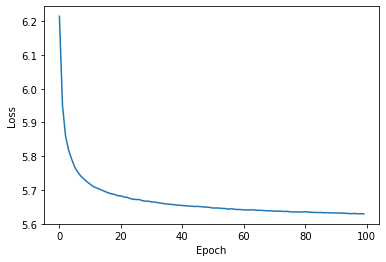

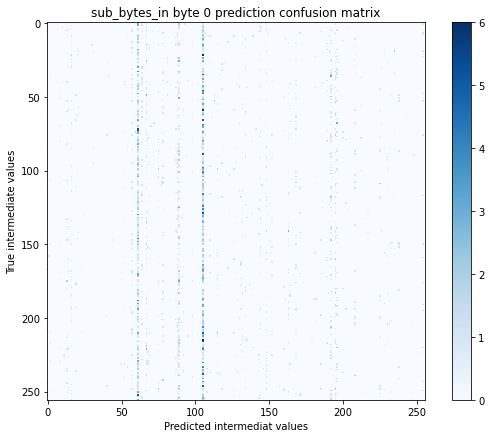

In [50]:
from matplotlib import pyplot as plt

plt.plot(history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

import json
import numpy as np
from tqdm.auto import tqdm
from collections import defaultdict
from tensorflow.keras import metrics
from tabulate import tabulate
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))
from scaaml.aes import ap_preds_to_key_preds
from scaaml.plot import plot_trace, plot_confusion_matrix
from scaaml.utils import tf_cap_memory, from_categorical
from scaaml.model import get_models_by_attack_point, get_models_list, load_model_from_disk
from scaaml.intro.generator import list_shards, load_attack_shard
from scaaml.utils import hex_display, bytelist_to_hex

DATASET_GLOB = "datasets/%s/test/*" % ('tinyaes')
shard_paths  = list_shards(DATASET_GLOB, 256)
np.load(shard_paths[2])

ATTACK_BYTE = 0
ATTACK_POINT = 'sub_bytes_in'
TRACE_LEN = 20000

NUM_TRACES = 8  # maximum number of traces to use to recover a given key byte. 10 is already overkill
correct_prediction_rank = defaultdict(list)
y_pred = []
y_true = []
for shard in tqdm(shard_paths, desc='Recovering bytes', unit='shards'):
    keys, pts, x, y = load_attack_shard(shard, ATTACK_BYTE, ATTACK_POINT, TRACE_LEN, num_traces=NUM_TRACES)

    p = tf.unstack(pts, axis=0)
    p = [np.argmax(pp.numpy()) for pp in p]
    p = int_to_ohbinary(p)
    p = tf.squeeze(p)
    
    x = tf.squeeze(x)
    
    # prediction
    predictions = mdl.predict([p, x])
    c_preds = from_categorical(predictions)
    c_y = from_categorical(y)
    y_pred.extend(c_preds)
    y_true.extend(c_y)
    
    # computing byte prediction from intermediate predictions
    key_preds = ap_preds_to_key_preds(predictions, pts, ATTACK_POINT)

    
    key = keys[0] # all the same in the same shard - not used in real attack
    vals = np.zeros((256))
    for trace_count, kp in enumerate(key_preds):
        vals = vals  + np.log10(kp + 1e-22) 
        guess_ranks = (np.argsort(vals, )[-256:][::-1])
        byte_rank = list(guess_ranks).index(key)
        correct_prediction_rank[trace_count].append(byte_rank)

plot_confusion_matrix(y_true, y_pred, normalize=True, title="%s byte %s prediction confusion matrix" % (ATTACK_POINT, ATTACK_BYTE))

In [48]:
print(y_pred)
print(y_true)

[89, 61, 192, 92, 61, 196, 89, 134, 0, 105, 78, 105, 105, 67, 105, 78, 75, 105, 67, 0, 126, 61, 64, 228, 105, 67, 89, 0, 14, 13, 61, 57, 232, 57, 105, 230, 235, 189, 61, 148, 196, 128, 161, 233, 89, 185, 77, 195, 91, 235, 88, 105, 52, 61, 192, 105, 61, 16, 105, 196, 200, 95, 105, 105, 200, 78, 61, 105, 98, 195, 61, 152, 143, 61, 105, 105, 105, 225, 61, 105, 225, 105, 141, 132, 144, 105, 61, 78, 52, 61, 105, 105, 61, 105, 118, 195, 61, 105, 105, 105, 89, 61, 254, 105, 105, 13, 52, 89, 115, 89, 105, 105, 107, 8, 105, 148, 64, 144, 77, 105, 16, 148, 225, 105, 105, 137, 88, 105, 105, 115, 105, 16, 138, 50, 132, 61, 52, 105, 78, 152, 61, 89, 0, 61, 61, 25, 163, 115, 195, 0, 192, 105, 168, 61, 61, 105, 61, 67, 213, 196, 196, 105, 61, 195, 78, 192, 89, 89, 105, 105, 88, 14, 189, 92, 148, 105, 228, 243, 0, 89, 105, 89, 105, 89, 61, 88, 200, 148, 0, 186, 16, 192, 134, 115, 89, 61, 238, 105, 61, 0, 213, 189, 61, 61, 105, 89, 64, 164, 0, 113, 192, 88, 67, 13, 61, 61, 105, 105, 104, 105, 105, 89, 